### BUSINESS PROBLEM-1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats

In [2]:
file_path = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//"
file_name = "LoansData.csv"
file_path + file_name

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//LoansData.csv'

In [4]:
ldata = pd.read_csv(file_path + file_name)

In [5]:
ldata.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [39]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [40]:
ldata.isnull().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [7]:
ldata.duplicated().sum()

0

In [ ]:
a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan 
amounts)

In [11]:
# converting interest rate to float datatype
# since loan amount and interest rate both are numeric data type, we can use the correlation method
# for the hypothesis testing

In [6]:
ldata['Interest.Rate'] = ldata['Interest.Rate'].str.replace('%','').astype('float')

In [7]:
ldata['Interest.Rate'].fillna(ldata['Interest.Rate'].median(), inplace=True)
ldata['Amount.Funded.By.Investors'].fillna(ldata['Amount.Funded.By.Investors'].mean(), inplace=True)

In [19]:
# H0: Interest rate is varied for different loan amounts
# Ha: Interest rate is not varied for different loan amounts

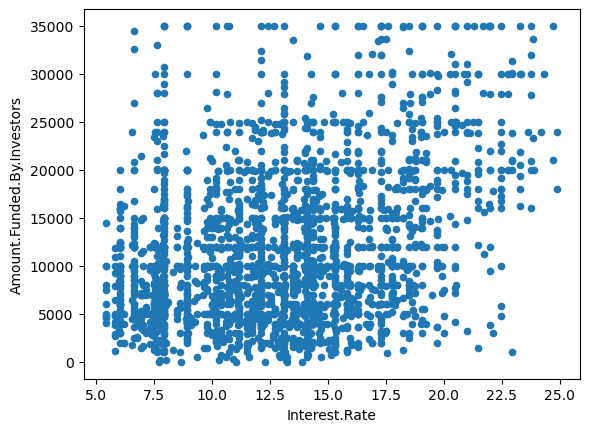

In [43]:
# Relationship between loan amount vs Interest rate
ldata.plot(kind='scatter', x='Interest.Rate', y='Amount.Funded.By.Investors')
plt.show()

In [44]:
ldata.loc[:,['Amount.Funded.By.Investors','Interest.Rate']].corr()

,Amount.Funded.By.Investors,Interest.Rate
Amount.Funded.By.Investors,1.00000,0.33743
Interest.Rate,0.33743,1.00000


In [45]:
# H0: Interest rate is varied for different loan amounts
# Ha: Interest rate is not varied for different loan amounts

# CI: 95%, p-value: 0.05

# perform the test
stats.pearsonr(ldata['Amount.Funded.By.Investors'],ldata['Interest.Rate'])

PearsonRResult(statistic=0.3374298974058292, pvalue=1.2724784377448871e-67)

In [30]:
# Conclusion: since p-value is very low compared to 0.05, we REJECT the NULL HYPOTHESIS.
# Hence interest rate is not varied for different loan amounts. 
# Interest rate has no statistically significant relation with the loan amounts

In [ ]:
b. Loan length is directly effecting intrest rate.

In [49]:
ldata['Loan.Length'].value_counts()

36 months    1952
60 months     548
Name: Loan.Length, dtype: int64

In [51]:
# loan length is categorical variable (2 categories) and interest rate is numeric data type now. 
# Hence we can use independent sample t-test for 2 samples

In [8]:
irate = 'Interest.Rate'

#filtering the data based on loan length
s1 = ldata.loc[ldata['Loan.Length'] == '36 months', irate]
s2 = ldata.loc[ldata['Loan.Length'] == '60 months', irate]

# display mean of both the segments
print('mean of s1:', s1.mean(),'| mean of s2:', s2.mean())

mean of s1: 12.127187500000002 | mean of s2: 16.407463503649634


In [13]:
# Ho: Loan length is directly effecting the interest rate
# Ha: loan length is not directly effecting the interest rate
# CI: 99%, p_value = 0.01

#perform the test
stats.ttest_ind(s1,s2)

Ttest_indResult(statistic=-23.41018409028735, pvalue=9.605991607836192e-110)

In [57]:
# Conclusion: Since p_value is less than 0.01, we REJECT the NULL HYPOTHESIS.
# Hence loan length is not directly effecting the interest rate

In [ ]:
c. Interest rate varies for different purpose of loans

In [7]:
# Total unique loan purpose
ldata['Loan.Purpose'].nunique()

14

In [ ]:
# loan purpose is categorical variable and interest rate is numeric data type now. 
# Hence we can use the ANOVA method to find the relationship between both the variables

In [53]:
# get the frequency of loan purpose
ldata['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [57]:
# creating a series of loan purpose
purpose = ldata['Loan.Purpose'].value_counts().index
# will need index while creating different sections
purpose

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car', 'wedding', 'medical',
       'moving', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype='object')

In [62]:
# creating dictionary of variables for saving the data as per loan purpose and,
# adding the data(interest rate) into the variables as per the loan purpose 
pdict = {}
irate = 'Interest.Rate'
for i in range(0,14):
    nam = 'p'+str(i+1)
    pdict[nam] = ldata.loc[ldata['Loan.Purpose']==purpose[i],irate]

In [63]:
# display the mean of the interest rate as per the loan purpose
for i in pdict:
    print("Mean of", i, "=", pdict[i].mean())

Mean of p1 = 13.58691660290742
Mean of p2 = 13.05078828828829
Mean of p3 = 13.15955223880597
Mean of p4 = 11.594276315789473
Mean of p5 = 10.797821782178216
Mean of p6 = 12.83919540229885
Mean of p7 = 11.113000000000001
Mean of p8 = 12.074358974358976
Mean of p9 = 11.649666666666667
Mean of p10 = 13.621034482758622
Mean of p11 = 11.966190476190476
Mean of p12 = 13.447999999999999
Mean of p13 = 11.007333333333332
Mean of p14 = 9.8775


In [75]:
# Ho: Interest rate varies for different purpose of loans
# Ha: Interest rate does not varies for different purpose of loans
# CI: 99%, p_value = 0.01

# perform the test
stats.f_oneway(pdict['p1'],
               pdict['p2'],
               pdict['p3'],
               pdict['p4'],
               pdict['p5'],
               pdict['p6'],
               pdict['p7'],
               pdict['p8'],
               pdict['p9'],
               pdict['p10'],
               pdict['p11'],
               pdict['p12'],
               pdict['p13'],
               pdict['p14'])

F_onewayResult(statistic=7.482212567168054, pvalue=1.1627206793499994e-14)

In [ ]:
# Conclusion: since p_value is less than 0.01, we REJECT the NULL Hypothesis
# Hence Interest rate does not varies statistically for different purpose of loans

In [ ]:
d. There is relationship between FICO scores and Home Ownership. It means that, People 
with owning home will have high FICO scores.

In [95]:
ldata.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [96]:
ldata['FICO.Range'].nunique()

38

In [97]:
ldata['Home.Ownership'].nunique()

5

In [101]:
ldata['FICO.Range'].fillna(ldata['FICO.Range'].mode().loc[0], inplace=True)
ldata['Home.Ownership'].fillna(ldata['Home.Ownership'].mode().loc[0], inplace=True)

In [98]:
# since both the variables are of type categorical. 
# We will use the chi-sq test for the hypothesis testing

In [102]:
# get the observation frequency from the dataset
obs_fq = pd.crosstab(ldata['FICO.Range'],ldata['Home.Ownership'])
obs_fq

Home.Ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO.Range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2
650-654,1,0,0,0,0
655-659,0,0,1,0,3
660-664,41,0,0,17,67
665-669,52,0,0,18,75
670-674,68,0,1,13,91
675-679,79,0,1,11,75
680-684,55,0,2,9,91


In [104]:
# Ho: There is relationship between FICO scores and Home Ownership
# Ha: There is no relationship between FICO scores and Home Ownership
# CI: 99%, p_value: 0.01

# performing the test
stats.chi2_contingency(obs_fq)

Chi2ContingencyResult(statistic=473.564802816852, pvalue=1.0065160858472195e-35, dof=148, expected_freq=array([[2.29600e+00, 2.00000e-03, 1.00000e-02, 4.00000e-01, 2.29200e+00],
       [1.37760e+00, 1.20000e-03, 6.00000e-03, 2.40000e-01, 1.37520e+00],
       [4.59200e-01, 4.00000e-04, 2.00000e-03, 8.00000e-02, 4.58400e-01],
       [1.83680e+00, 1.60000e-03, 8.00000e-03, 3.20000e-01, 1.83360e+00],
       [5.74000e+01, 5.00000e-02, 2.50000e-01, 1.00000e+01, 5.73000e+01],
       [6.65840e+01, 5.80000e-02, 2.90000e-01, 1.16000e+01, 6.64680e+01],
       [7.94416e+01, 6.92000e-02, 3.46000e-01, 1.38400e+01, 7.93032e+01],
       [7.62272e+01, 6.64000e-02, 3.32000e-01, 1.32800e+01, 7.60944e+01],
       [7.20944e+01, 6.28000e-02, 3.14000e-01, 1.25600e+01, 7.19688e+01],
       [6.24512e+01, 5.44000e-02, 2.72000e-01, 1.08800e+01, 6.23424e+01],
       [6.42880e+01, 5.60000e-02, 2.80000e-01, 1.12000e+01, 6.41760e+01],
       [7.02576e+01, 6.12000e-02, 3.06000e-01, 1.22400e+01, 7.01352e+01],
       [

In [105]:
# Conclusion: since p_value is less than 0.01, we REJECT the NULL Hypothesis.
# Hence we can say that, there is no relationship between FICO scores and Home Ownership

### BUSINESS PROBLEM - 2

In [14]:
file_path = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//"
file_name = "Price_Quotes.csv"
file_path + file_name

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//Price_Quotes.csv'

In [15]:
pqdata = pd.read_csv(file_path + file_name)

In [16]:
pqdata

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [ ]:
Q. We would like to assess if there is any difference in the average 
price quotes provided by Mary and Barry.

In [18]:
#filtering the data of Mary and Barry
s_m = pqdata['Mary_Price']
s_b = pqdata['Barry_Price']

# display mean of both the segments
print('mean of s_m:', s_m.mean(),'| mean of s_b:', s_b.mean())

mean of s_m: 114.75 | mean of s_b: 124.33333333333333


In [19]:
# Since both the samples are independent to each other and there are 2 samples of data.
# We can use t-test for two independent samples

In [20]:
# Ho: There is difference in the average price quotes provided by Mary and Barry
# Ha: There is no difference in the average price quotes provided by Mary and Barry
# CI: 99%, p_value: 0.01

# performing the test
stats.ttest_ind(s_m, s_b)

Ttest_indResult(statistic=-1.4147436739281787, pvalue=0.17114226132118285)

In [21]:
# Conclusion: since p_value is greater than 0.01, we DON't REJECT the NULL Hypothesis.
# Hence we can say that, There is difference in the average price quotes provided by Mary and Barry

### BUSINESS PROBLEM - 3

In [ ]:
Determine what effect, if any, the reengineering effort had on the 
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Isthere evidence that the critical incidence rate
improved?

In [22]:
file_path = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//"
file_name = "Treatment_Facility.csv"
file_path + file_name

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//Treatment_Facility.csv'

In [23]:
tfdata = pd.read_csv(file_path + file_name)

In [24]:
tfdata

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [34]:
# changing the columns name var4 = TRFF(%) and var5 = CI (%)
tfdata.columns = ['Month', 'Reengineer', 'Employee_Turnover', 'TRFF(%)', 'CI (%)']

In [36]:
# our question is about incidence rate only we are considering only CI%
# filtering the data based on prior and post
s_prior = tfdata.loc[tfdata['Reengineer'] == 'Prior', 'CI (%)']
s_post = tfdata.loc[tfdata['Reengineer'] == 'Post', 'CI (%)']

# display mean of both the segments
print('mean of s_prior:', s_prior.mean(),'| mean of s_post:', s_post.mean())

mean of s_prior: 53.887906321846145 | mean of s_post: 23.34971927988571


In [ ]:
# Question:  is there evidence that the critical incidence (CI%) rate improved?
# We can go with independent sample test along with alternatives = 

In [37]:
stats.ttest_ind?

In [38]:
# Ho: The critical incidence (CI%) rate improved (u_post < u_prior)
# Ha: The critical incidence (CI%) rate did not improve (u_post >= u_prior)
# CI: 99%, p_value: 0.01

# performing the test
stats.ttest_ind(s_post, s_prior)

Ttest_indResult(statistic=-1.627914425352865, pvalue=0.12091989189884148)

In [ ]:
# Conclusion: since p_value is greater than 0.01, we DON't REJECT the NULL Hypothesis.
# Hence we can say that, The critical incidence (CI%) rate improved after the re-engineering effort

### BUSINESS PROBLEM - 4

In [ ]:
We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring.

In [4]:
file_path = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//"
file_name = "Priority_Assessment.csv"
file_path + file_name

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//Priority_Assessment.csv'

In [5]:
padata = pd.read_csv(file_path + file_name)

In [5]:
padata

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [6]:
# since we need to compare between three samples, we can use the ANOVA test method
# Segregating the data into 3 segments: High, Medium, Low
s_high = padata.loc[padata['Priority']=='High', 'Days']
s_med = padata.loc[padata['Priority']=='Medium', 'Days']
s_low = padata.loc[padata['Priority']=='Low', 'Days']

# displaying the mean of all the 3 segments
print('mean of s_high:', s_high.mean(),'| mean of s_med:', s_med.mean(), '| mean of s_low:', s_low.mean())

mean of s_high: 3.0236196319018402 | mean of s_med: 2.5 | mean of s_low: 4.228358208955224


In [7]:
# Ho: avg_high < avg_medium < avg_low
# Ha: avg_high = avg_medium = avg_low
# CI: 99%, p_value: 0.01

# performing the test
stats.f_oneway(s_high, s_med, s_low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [ ]:
# Conclusion: since p_value is greater than 0.01, we DON't REJECT the NULL Hypothesis.
# Hence we can say that, prioritization system is working properly avg_high < avg_medium < avg_low

### BUSINESS PROBLEM - 5

In [ ]:
Use the survey results to addressthe following questions
 What isthe overall level of customer satisfaction?
 What factors are linked to satisfaction?
 What is the demographic profile of Film on the Rocks patrons?
 In what media outlet(s) should the film series be advertised?

In [38]:
file_path = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//"
file_name = "Films.csv"
file_path + file_name

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//4. Basic Statistics - Hypothesis Testing//Films.csv'

In [39]:
fdata = pd.read_csv(file_path + file_name)

In [40]:
fdata

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [10]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [66]:
fdata.isnull().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [41]:
# since all the nulls are of dicrete type(whether numerical or categorical), we will use the mode to 
# fill the missing values
def null_imputer(x):
    x.fillna(x.mode().loc[0], inplace=True)
    return x

In [42]:
fdata = fdata.apply(null_imputer)

In [69]:
fdata.isnull().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [43]:
for x in fdata.columns:
    print('unique values in',x, fdata[x].unique())

unique values in _rowstate_ [0]
unique values in Movie ['Ferris Buellers Day Off' 'Willy Wonka' 'Old School']
unique values in Gender ['Female' 'Male' '2' '1']
unique values in Marital_Status ['Married' 'Single' 'Slngle' '1' '2']
unique values in Sinage [2. 1. 3. 5. 4.]
unique values in Parking [2. 1. 4. 3. 5.]
unique values in Clean [2. 1. 3. 4. 5.]
unique values in Overall [2. 1. 5. 3. 4.]
unique values in Age [3. 2. 4. 1.]
unique values in Income [1. 3. 2.]
unique values in Hear_About ['5' '1' '4' '2' '3' '4,5' '2,5' '1,5' '3,4' '5,4' '3,5']


In [44]:
# we need to correct the (gender, marital_status, hear_about) column values
fdata['Gender'].replace(['Male'], '1', inplace=True)
fdata['Gender'].replace(['Female'], '2', inplace=True)
fdata['Marital_Status'].replace(['Married'], '1', inplace=True)
fdata['Marital_Status'].replace(['Single','Slngle'], '2', inplace=True)
fdata['Hear_About'].replace(['4,5','2,5','1,5','3,4','5,4','3,5'], fdata['Hear_About'].mode().loc[0], inplace=True)

In [45]:
for x in fdata.columns:
    print('unique values in',x, fdata[x].unique())

unique values in _rowstate_ [0]
unique values in Movie ['Ferris Buellers Day Off' 'Willy Wonka' 'Old School']
unique values in Gender ['2' '1']
unique values in Marital_Status ['1' '2']
unique values in Sinage [2. 1. 3. 5. 4.]
unique values in Parking [2. 1. 4. 3. 5.]
unique values in Clean [2. 1. 3. 4. 5.]
unique values in Overall [2. 1. 5. 3. 4.]
unique values in Age [3. 2. 4. 1.]
unique values in Income [1. 3. 2.]
unique values in Hear_About ['5' '1' '4' '2' '3']


In [46]:
fdata['Overall'].mean()

1.621212121212121

In [ ]:
# since the above mean is the sample mean, we want to know the population mean. 
# Hence to find the population mean, we will use the sample mean with 95% confidence interval (CI)

# sample mean - 1.96 * (standard error) < population mean < sample mean + 1.96 * (standard error)

In [47]:
sample_mean = fdata['Overall'].mean()
n = fdata['Overall'].count()
sample_std = fdata['Overall'].std()

standard_error = sample_std/np.sqrt(n)
low_limit = sample_mean - 1.96 * standard_error
high_limit = sample_mean + 1.96 * standard_error

# 1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor
print("Population mean (Overall Customer Satisfaction) is between"
      , low_limit, 'and', high_limit, 'with 95% confidence' )

Population mean (Overall Customer Satisfaction) is between 1.5469994901816928 and 1.6954247522425494 with 95% confidence


In [48]:
fdata.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [ ]:
# To find the what factors are linked with customer satisfaction ?

# We will divide our columns into two parts: 1. Numeric 2. Categorical

# First to find the NUMERIC factors linked with customer satisfaction, we will use the correlation method
# since the overall satisfaction and the variables (Sinage, Parking, Clean) shares the same metric 
# we will assume them to be numeric in respect to the overall

In [49]:
num_factor = fdata.loc[:,['Overall','Sinage','Parking','Clean']]
num_factor.corr()

,Overall,Sinage,Parking,Clean
Overall,1.000000,0.382103,0.514429,0.350822
Sinage,0.382103,1.000000,0.469180,0.349144
Parking,0.514429,0.469180,1.000000,0.440771
Clean,0.350822,0.349144,0.440771,1.000000


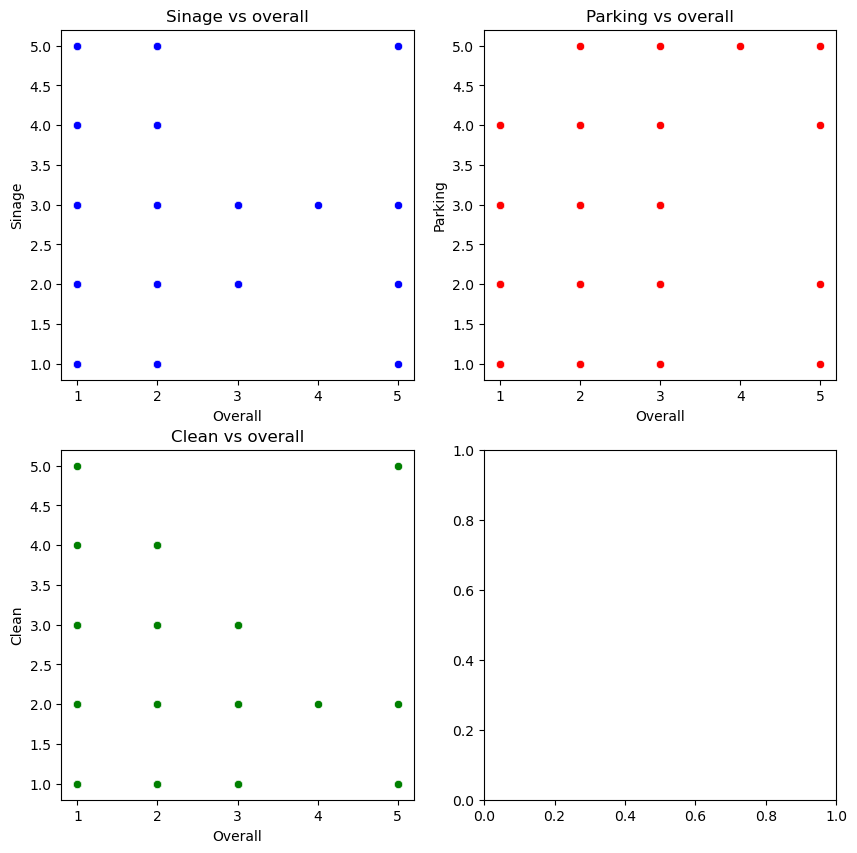

In [50]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize = (10,10))
axs[0,0].set_title("Sinage vs overall")
axs[0,1].set_title("Parking vs overall")
axs[1,0].set_title("Clean vs overall")

sns.scatterplot(data=num_factor, x='Overall', y='Sinage', color='blue',ax=axs[0,0])
sns.scatterplot(data=num_factor, x='Overall', y='Parking', color='red' ,ax=axs[0,1])
sns.scatterplot(data=num_factor, x='Overall', y='Clean', color='green',ax=axs[1,0])

plt.show()

In [51]:
# H0: Factor is linked to the overall satisfaction
# Ha: Factor is NOT linked to the overall satisfaction
# CI: 95%, p-value: 0.05

# perform the test
print('Sinage vs overall:', stats.pearsonr(num_factor['Overall'], num_factor['Sinage']))
print('Parking vs overall:', stats.pearsonr(num_factor['Overall'], num_factor['Parking']))
print('Clean vs overall:', stats.pearsonr(num_factor['Overall'], num_factor['Clean']))

Sinage vs overall: PearsonRResult(statistic=0.3821028042239567, pvalue=6.501065434766499e-13)
Parking vs overall: PearsonRResult(statistic=0.5144289487855271, pvalue=1.0840276087789895e-23)
Clean vs overall: PearsonRResult(statistic=0.35082227890709217, pvalue=5.437550007439627e-11)


In [39]:
# Conclusion: Since p-value is less than 0.05 in all the three 3 cases. We will REJECT the NULL Hypothesis.
# Hence none of the factor from (Sinage, Parking, Clean) is statistically linked with overall satisfaction

In [40]:
fdata.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [52]:
cat_factor = fdata.loc[:,['Movie','Gender','Marital_Status','Age','Income','Hear_About','Overall']]

In [53]:
for x in cat_factor.columns:
    print('unique values in',x, cat_factor[x].unique())

unique values in Movie ['Ferris Buellers Day Off' 'Willy Wonka' 'Old School']
unique values in Gender ['2' '1']
unique values in Marital_Status ['1' '2']
unique values in Age [3. 2. 4. 1.]
unique values in Income [1. 3. 2.]
unique values in Hear_About ['5' '1' '4' '2' '3']
unique values in Overall [2. 1. 5. 3. 4.]


In [56]:
# converting the age and income values to object to create consistency in the data. Because these are
# categories and not the absolute number

cat_factor.replace({'Age': {1: '1', 2: '2', 3: '3', 4: '4'},
               'Income':{1: '1',2: '2', 3:'3'}}, inplace=True)

In [58]:
for x in cat_factor.columns:
    print('unique values in',x, cat_factor[x].unique())

unique values in Movie ['Ferris Buellers Day Off' 'Willy Wonka' 'Old School']
unique values in Gender ['2' '1']
unique values in Marital_Status ['1' '2']
unique values in Age ['3' '2' '4' '1']
unique values in Income ['1' '3' '2']
unique values in Hear_About ['5' '1' '4' '2' '3']
unique values in Overall [2. 1. 5. 3. 4.]


In [74]:
# Second to find the Categorical factors linked with customer satisfaction, we can use the 
# independent t-test method for ('Gender','marital_status') variables and 
# ANOVA method for ('Movie', 'Age', 'Income', 'Hear_About') variables

In [75]:
# filtering the data based on 'Gender'
s_male = cat_factor.loc[cat_factor['Gender'] == '1', 'Overall']
s_female = cat_factor.loc[cat_factor['Gender'] == '2', 'Overall']

# display mean of both the segments
print('Overall satisfaction mean of male:', s_male.mean(),
      '| Overall satisfaction mean of female:', s_female.mean())

Overall satisfaction mean of male: 1.6923076923076923 | Overall satisfaction mean of female: 1.5821596244131455


In [71]:
# Ho: There is difference in overall satisfaction based on gender
# Ha: There is no difference in overall satisfaction based on gender
# CI: 95%, p_value: 0.05

# performing the test
stats.ttest_ind(s_male, s_female)

Ttest_indResult(statistic=1.393621669674226, pvalue=0.16437541932112798)

In [ ]:
# Conclusion: Since p-value is greater than 0.05. We will DON'T REJECT the NULL Hypothesis.
# Hence statistically there is difference in overall satisfaction based on gender

In [74]:
# filtering the data based on 'marital_status'
s_married = cat_factor.loc[cat_factor['Marital_Status'] == '1', 'Overall']
s_single = cat_factor.loc[cat_factor['Marital_Status'] == '2', 'Overall']

# display mean of both the segments
print('Overall satisfaction mean of married:', s_married.mean(),
      '| Overall satisfaction mean of single:', s_single.mean())

Overall satisfaction mean of married: 1.58 | Overall satisfaction mean of single: 1.6391304347826088


In [73]:
# Ho: There is difference in overall satisfaction based on marital_status
# Ha: There is no difference in overall satisfaction based on marital_status
# CI: 95%, p_value: 0.05

# performing the test
stats.ttest_ind(s_single, s_married)

Ttest_indResult(statistic=0.7171640309514444, pvalue=0.47378328196635067)

In [ ]:
# Conclusion: Since p-value is greater than 0.05. We will DON'T REJECT the NULL Hypothesis.
# Hence statistically there is difference in overall satisfaction based on marital_status

In [69]:
for x in cat_factor.columns:
    print('unique values in',x, cat_factor[x].unique())

unique values in Movie ['Ferris Buellers Day Off' 'Willy Wonka' 'Old School']
unique values in Gender ['2' '1']
unique values in Marital_Status ['1' '2']
unique values in Age ['3' '2' '4' '1']
unique values in Income ['1' '3' '2']
unique values in Hear_About ['5' '1' '4' '2' '3']
unique values in Overall [2. 1. 5. 3. 4.]


In [80]:
# filtering the data based on 'movie'
sm_1 = cat_factor.loc[cat_factor['Movie']=='Ferris Buellers Day Off','Overall']
sm_2 = cat_factor.loc[cat_factor['Movie']=='Willy Wonka','Overall']
sm_3 = cat_factor.loc[cat_factor['Movie']=='Old School','Overall']

# displaying mean of the segments
print('Overall satisfaction mean of Ferris Buellers Day Off:', sm_1.mean(),
      '| Overall satisfaction mean of Willy Wonka:', sm_2.mean(),
      '| Overall satisfaction mean of Old School:', sm_3.mean())

Overall satisfaction mean of Ferris Buellers Day Off: 1.6569343065693432 | Overall satisfaction mean of Willy Wonka: 1.6273291925465838 | Overall satisfaction mean of Old School: 1.4375


In [81]:
# Ho: There is difference in overall satisfaction based on movie
# Ha: There is no difference in overall satisfaction based on movie
# CI: 95%, p_value: 0.05

# performing the ANOVA test
stats.f_oneway(sm_1,sm_2,sm_3)

F_onewayResult(statistic=1.3352437528862333, pvalue=0.2645245972839759)

In [78]:
# Conclusion: Since p-value is greater than 0.05. We will DON'T REJECT the NULL Hypothesis.
# Hence statistically there is difference in overall satisfaction based on movie

In [82]:
# filtering the data based on 'age'
sa_1 = cat_factor.loc[cat_factor['Age']=='1','Overall']
sa_2 = cat_factor.loc[cat_factor['Age']=='2','Overall']
sa_3 = cat_factor.loc[cat_factor['Age']=='3','Overall']
sa_4 = cat_factor.loc[cat_factor['Age']=='4','Overall']

# displaying mean of the segments
print('Overall satisfaction mean of age 1 to 12 yrs:', sa_1.mean(),
      '| Overall satisfaction mean of age 13 to 30 yrs:', sa_2.mean(),
      '| Overall satisfaction mean of age 31 to 60 yrs:', sa_3.mean(),
     '| Overall satisfaction mean of age 60+ yrs:', sa_4.mean())

Overall satisfaction mean of age 1 to 12 yrs: 1.5384615384615385 | Overall satisfaction mean of age 13 to 30 yrs: 1.6779661016949152 | Overall satisfaction mean of age 31 to 60 yrs: 1.547008547008547 | Overall satisfaction mean of age 60+ yrs: 1.7


In [83]:
# Ho: There is difference in overall satisfaction based on age
# Ha: There is no difference in overall satisfaction based on age
# CI: 95%, p_value: 0.05

# performing the ANOVA test
stats.f_oneway(sa_1,sa_2,sa_3,sa_4)

F_onewayResult(statistic=1.0249927945692117, pvalue=0.3816737451872579)

In [ ]:
# Conclusion: Since p-value is greater than 0.05. We will DON'T REJECT the NULL Hypothesis.
# Hence statistically there is difference in overall satisfaction based on age

In [84]:
# filtering the data based on 'income'
si_1 = cat_factor.loc[cat_factor['Income']=='1','Overall']
si_2 = cat_factor.loc[cat_factor['Income']=='2','Overall']
si_3 = cat_factor.loc[cat_factor['Income']=='3','Overall']

# displaying mean of the segments
print('Overall satisfaction mean of income >$50,000:', si_1.mean(),
      '| Overall satisfaction mean of income $50-$100,000:', si_2.mean(),
      '| Overall satisfaction mean of income $100,000+:', si_3.mean())

Overall satisfaction mean of income >$50,000: 1.639240506329114 | Overall satisfaction mean of income $50-$100,000: 1.5853658536585367 | Overall satisfaction mean of income $100,000+: 1.6222222222222222


In [85]:
# Ho: There is difference in overall satisfaction based on income
# Ha: There is no difference in overall satisfaction based income
# CI: 95%, p_value: 0.05

# performing the ANOVA test
stats.f_oneway(si_1,si_2,si_3)

F_onewayResult(statistic=0.16488481054397225, pvalue=0.8480618362664597)

In [86]:
# Conclusion: Since p-value is greater than 0.05. We will DON'T REJECT the NULL Hypothesis.
# Hence statistically there is difference in overall satisfaction based on income

In [ ]:
Hear_About

In [87]:
# filtering the data based on 'Hear_About'
sh_1 = cat_factor.loc[cat_factor['Hear_About']=='1','Overall']
sh_2 = cat_factor.loc[cat_factor['Hear_About']=='2','Overall']
sh_3 = cat_factor.loc[cat_factor['Hear_About']=='3','Overall']
sh_4 = cat_factor.loc[cat_factor['Hear_About']=='4','Overall']
sh_5 = cat_factor.loc[cat_factor['Hear_About']=='5','Overall']

# displaying mean of the segments
print('Overall satisfaction mean of hear about television:', sh_1.mean(),
      '| Overall satisfaction mean of hear about newspaper:', sh_2.mean(),
      '| Overall satisfaction mean of hear about radio:', sh_3.mean(),
     '| Overall satisfaction mean of hear about website:', sh_4.mean(),
     '| Overall satisfaction mean of hear about word of mouth:', sh_5.mean())

Overall satisfaction mean of hear about television: 1.8636363636363635 | Overall satisfaction mean of hear about newspaper: 1.25 | Overall satisfaction mean of hear about radio: 1.2857142857142858 | Overall satisfaction mean of hear about website: 1.6585365853658536 | Overall satisfaction mean of hear about word of mouth: 1.6307053941908713


In [88]:
# Ho: There is difference in overall satisfaction based on hear_about
# Ha: There is no difference in overall satisfaction based hear_about
# CI: 95%, p_value: 0.05

# performing the ANOVA test
stats.f_oneway(sh_1,sh_2,sh_3,sh_4,sh_5)

F_onewayResult(statistic=2.474970445120239, pvalue=0.044264783614213224)

In [89]:
# Conclusion: Since p-value is less than 0.05. We will REJECT the NULL Hypothesis.
# Hence statistically there is no difference in overall satisfaction based on hear_about

In [90]:
# age, gender, marital_status, income

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
demog = fdata.loc[:, ['Gender','Marital_Status','Age','Income']]

In [13]:
demog.replace({'Gender': {'1': 'Male', '2': 'Female'},
               'Marital_Status':{'1':'Married','2':'Single'},
               'Age':{1: '1-12 yrs', 2: '13-30 yrs', 3: '31-60 yrs', 4: '60+ yrs'},
               'Income': {1: '<$50,000', 2: "$50-$100,000", 3: '$100,000+'}}, inplace=True)

In [ ]:
# patrons demographic profile
fig = plt.figure(figsize = (18,10))

ax1 = plt.subplot2grid((2,2),(0,0))
plt.title('Patrons Genderwise distribution')
plt.pie(demog['Gender'].value_counts(),autopct='%1.1f%%')
plt.legend(list(demog['Gender'].value_counts().index))

ax1 = plt.subplot2grid((2,2),(0,1))
plt.title('Patrons Marital_Status wise distribution')
plt.pie(demog['Marital_Status'].value_counts(),autopct='%1.1f%%')
plt.legend(list(demog['Marital_Status'].value_counts().index))

ax1 = plt.subplot2grid((2,2),(1,0))
plt.title('Patrons age wise distribution')
plt.pie(demog['Age'].value_counts(),autopct='%1.1f%%')
plt.legend(list(demog['Age'].value_counts().index))

ax1 = plt.subplot2grid((2,2),(1,1))
plt.title('Patrons income wise distribution')
plt.pie(demog['Income'].value_counts(),autopct='%1.1f%%')
plt.legend(list(demog['Income'].value_counts().index))

plt.show()


In [59]:
adv = fdata['Hear_About']

In [60]:
adv.replace({'1':'television', '2':'newspaper', '3':'radio', '4':'website', '5':'word of mouth'}, inplace=True)

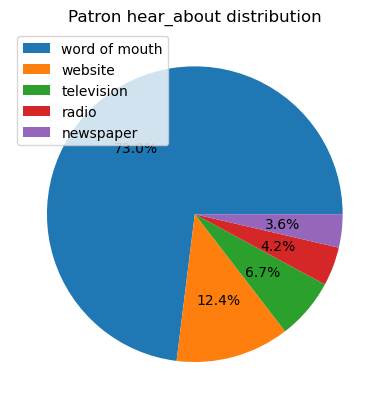

In [61]:
plt.title('Patron hear_about distribution')
plt.pie(adv.value_counts(),autopct='%1.1f%%')
plt.legend(list(adv.value_counts().index))
plt.show()

In [28]:
# so with help of our advertising team and possible budget we can choose which media outlet should be used
# for the advertisement